In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/squat60.1.csv' , sep=';' , decimal='.')
df.set_index('Time', inplace=True)
df

Ax       Ay       Az       Gx        Gy       Gz        BAR  \
Time                                                                      
0      9.22379  3.05962  0.12397  0.51117  -2.25067  0.70190  992.16357   
1      9.17947  2.79313 -0.25272 -0.95367   1.96075  5.27954  992.16168   
2      8.44765  2.48770 -0.44915 -6.32476  11.17705  6.62231  992.16187   
3      6.54864  1.69121 -0.10720 -0.95367  34.24833  3.13568  992.15485   
4      5.08021  0.88573  0.85938  7.22503  32.60037 -7.54546  992.15295   
...        ...      ...      ...      ...       ...      ...        ...   
586    7.48827  3.96152  3.63214 -5.59997  -9.02557 -1.50299  992.21906   
587    6.51870  3.48722  3.90463  2.02942  -4.26483 -0.95367  992.15930   
588    8.77344  4.69394  3.78306 -3.58581  -3.04413  1.60980  992.20844   
589   11.66059  6.32466  5.25688  3.79944   0.12970  3.37982  992.26984   
590   11.00603  6.14500  5.64674  7.09533   5.37872 -2.23541  992.28448   

             P         R      Mag  UP  DOWN  
Time                                         
0    -18.34967  89.23000  0.98724   0     0  
1    -16.91789  88.42297  0.97367   0     0  
2    -16.38699  86.95651  0.94906   0     0  
3    -14.47858  89.06219  0.98415   0     0  
4     -9.75418  80.39864  0.83562   0     0  
...        ...       ...      ...  ..   ...  
586  -25.45410  64.12453  0.60595   0     1  
587  -24.65161  59.07883  0.53297   0     0  
588  -26.16444  66.67456  0.64462   0     0  
589  -26.31102  65.73299  0.63159   0     0  
590  -26.41653  62.83950  0.59118   0     0  

[591 rows x 12 columns]

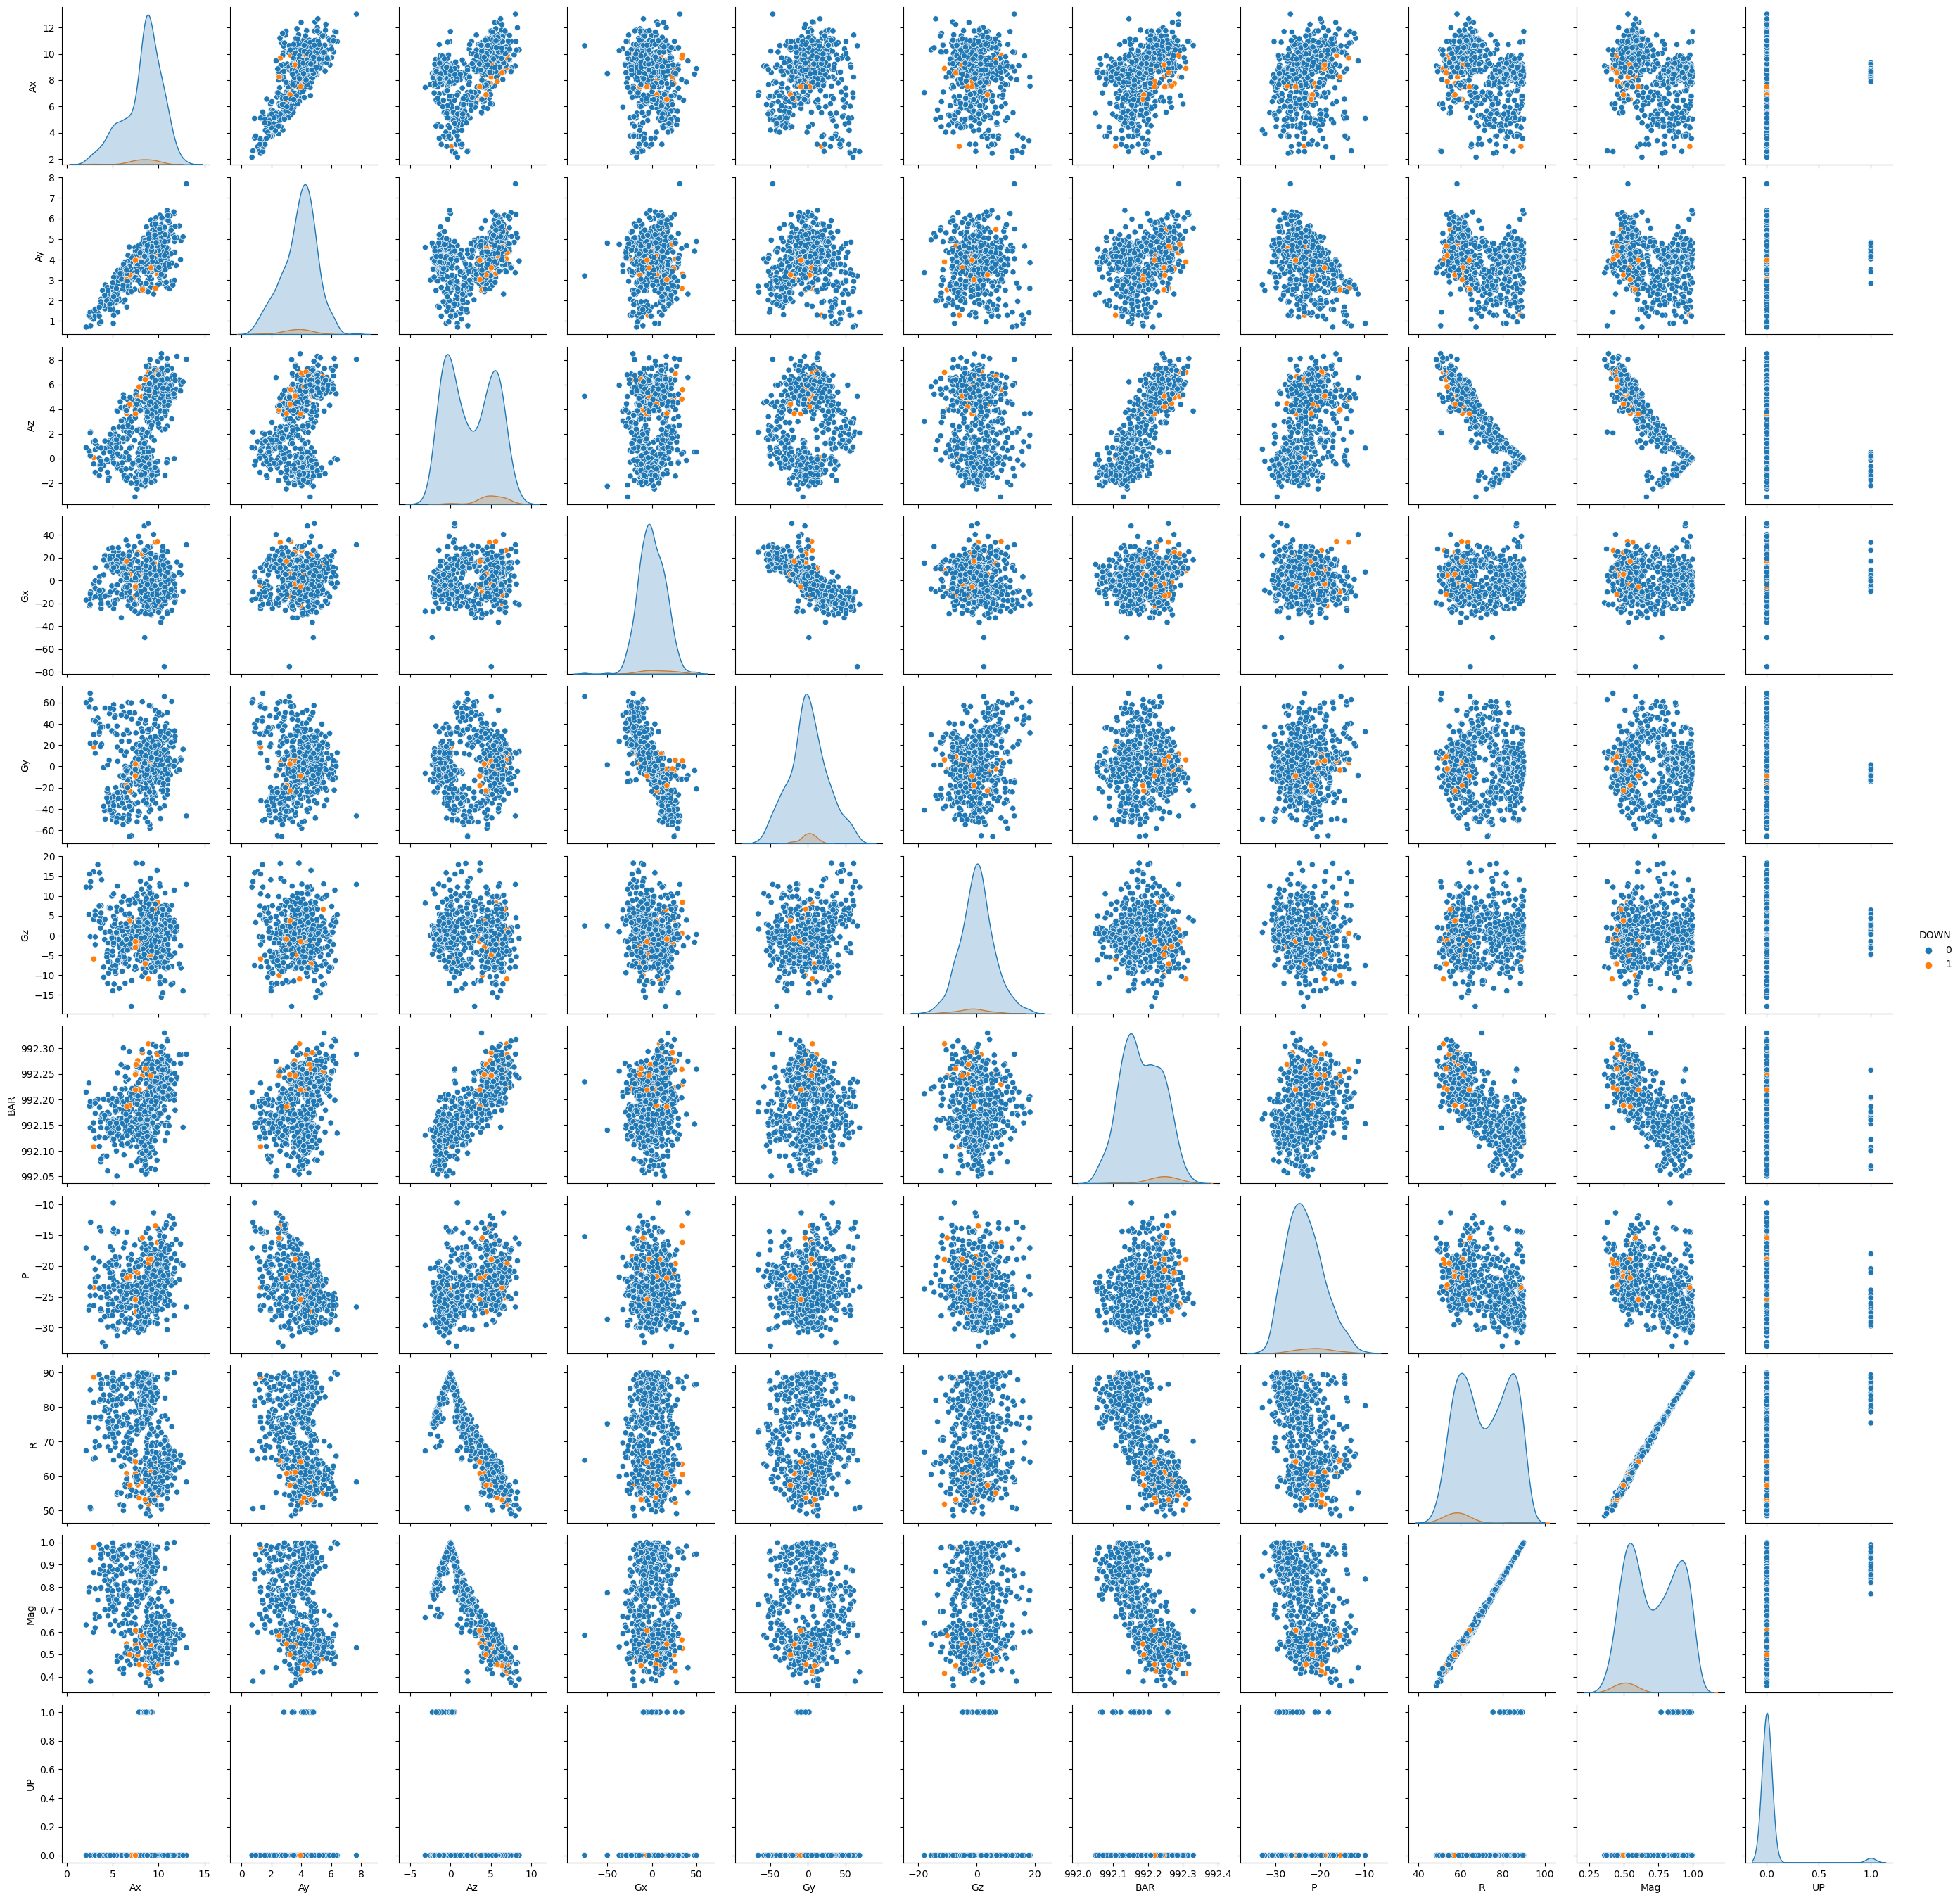

In [49]:
# g = sns.pairplot(df, hue =  'DOWN')

/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:   0.982
Precision:  0.0
Recall:     0.0


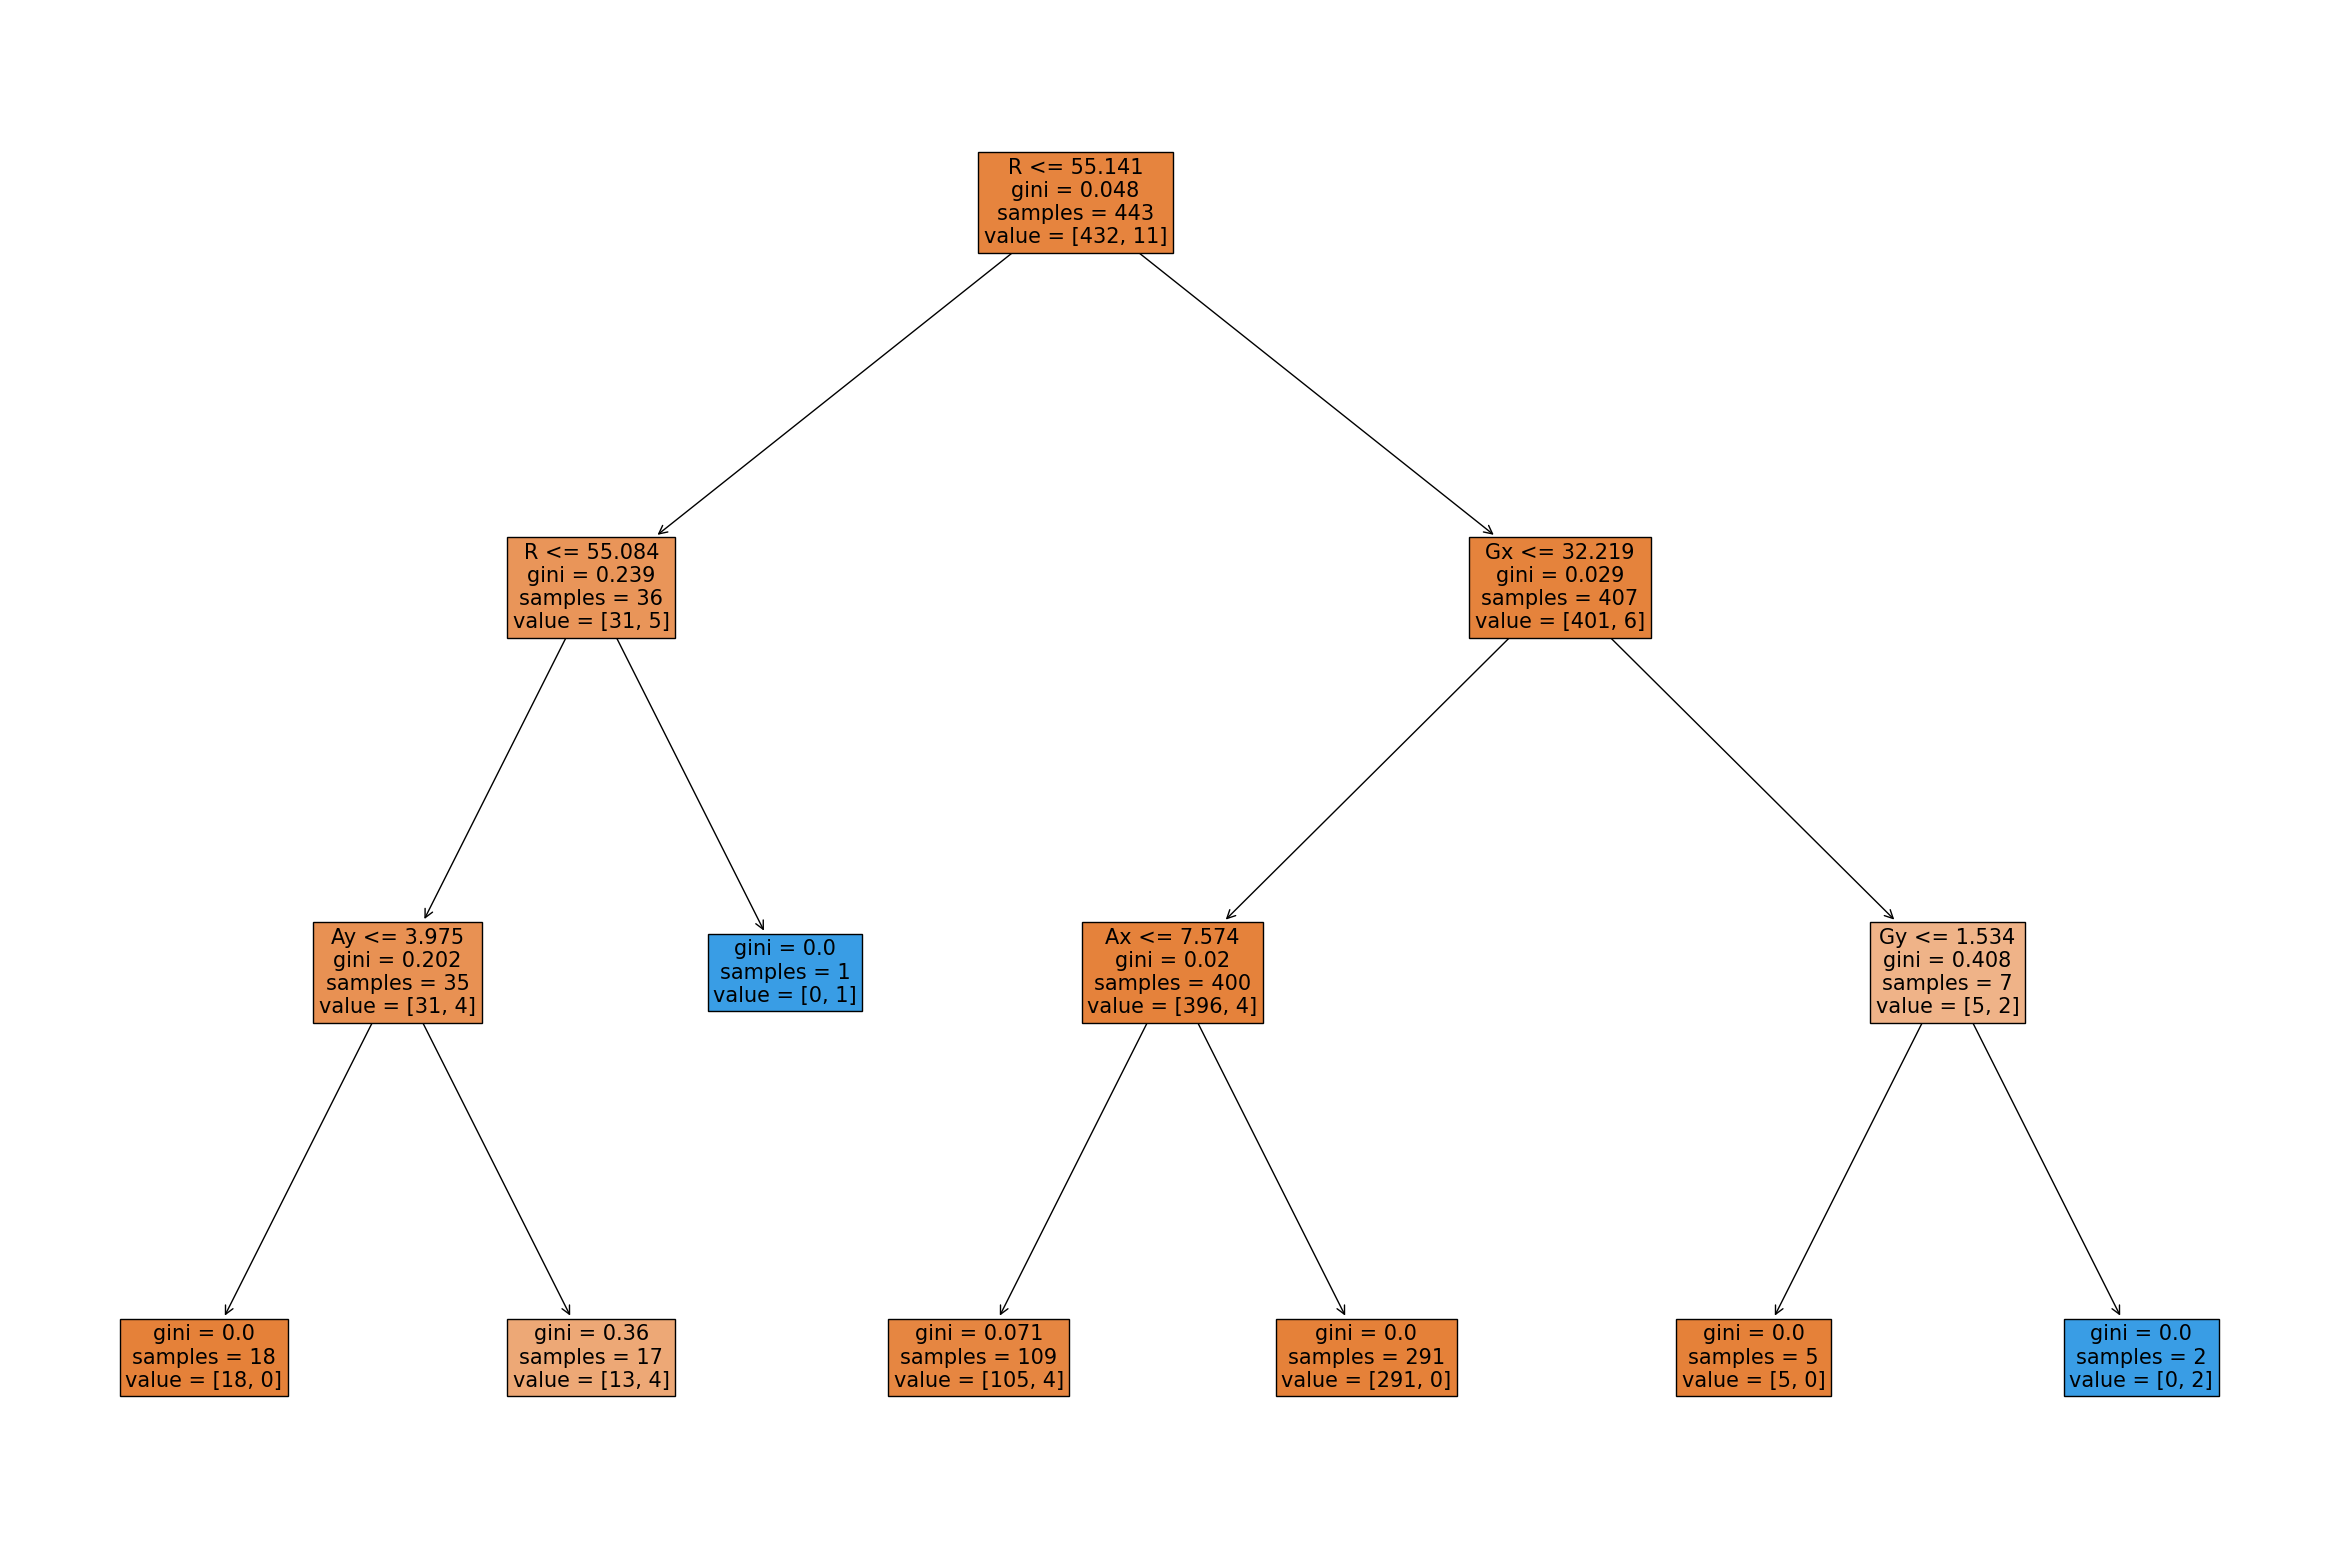

In [44]:
max_lunghezza_albero = 3
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 

y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','Mag'], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=None)
# clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.005)
clf = DecisionTreeClassifier(max_depth=max_lunghezza_albero)
# clf = DecisionTreeRegressor(ccp_alpha=0.01, max_depth=4)
clf = clf.fit(X_train, y_train)
param = clf.get_params()
predictions = clf.predict(X_test)
accuracy = clf.score(X_train, y_train)
precision = precision_score(y_true= y_test, y_pred=predictions)
recall = recall_score(y_true= y_test, y_pred=predictions)

print('Accuracy:  ', round(accuracy,3))
print('Precision: ', round(precision,3))
print('Recall:    ', round(recall,3))

from sklearn import tree
feature_names = X.columns
fig = plt.figure(figsize=(30,20))
_= tree.plot_tree(clf, 
        feature_names=feature_names, 
        filled=True, fontsize=15)


            0
Gy   0.374479
R    0.333556
Gx   0.137090
Ay   0.126882
Ax   0.027993
Az   0.000000
Gz   0.000000
BAR  0.000000
P    0.000000
UP   0.000000


<AxesSubplot:>

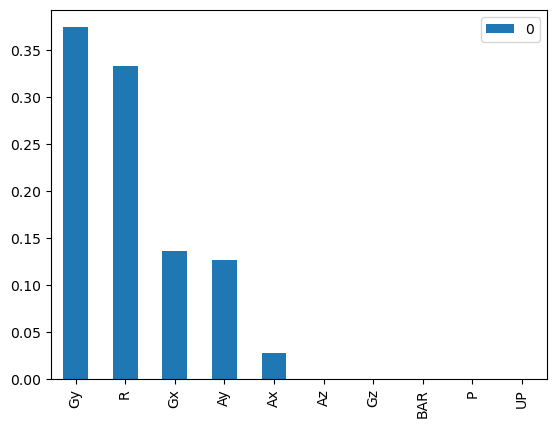

In [45]:
##importanza features
feature_names = X.columns
feature_importance = pd.DataFrame(clf.feature_importances_, index=feature_names).sort_values(0, ascending=False)

print(feature_importance.head(10))
important_features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

In [58]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=4)
log_reg.fit(X_train, y_train)

# Methods we can use in Logistic

# predict - Predict class labels for samples in X
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

# print('Probabilità di previsione:',pred_proba.mean())

/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-3.08688319e-05, -1.48762574e-05,  1.79035777e-05,
         8.58277536e-05, -1.55641298e-05,  1.10256669e-06,
        -3.94047446e-03,  1.12639977e-04, -4.17328062e-04,
        -4.44521272e-07]])